Implementing the exercises from Han van der Maas' book https://santafeinstitute.github.io/ComplexPsych/ in Python.

Chapter 3. Transitions

Anne Urai, Leiden University, 2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


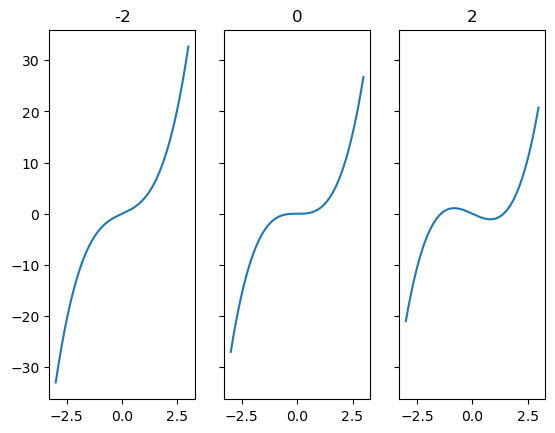

In [16]:
# figure 3.4
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
V = lambda X, a: -a*X + X**3 # note that raising to a power is ** in Python, not ^
X = np.arange(-3, 3, 0.01)
for ax, a in zip(axs, [-2, 0, 2]):
    ax.plot(X, V(X, a))   
    ax.set(title=a)

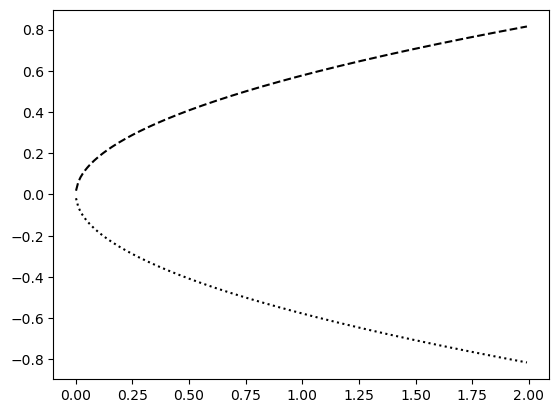

In [ ]:
# figure 3.5 
# define the first and second derivatives of V
V = lambda X, a: -a*X + X**3 # note that raising to a power is ** in Python, not ^
V_prime = lambda X, a: -a + X**2 
V_pprime = lambda X, a: a*0 + 6*X # keep a in the function definition just for ease of passing the same arguments

# set the first derivative to zero
X_fp = lambda a: (-np.sqrt(a/3), np.sqrt(a/3))
X_ffp = lambda X: 6*X # solution to second derivative

a = np.arange(0.001, 2, 0.01) # exclude 0 for plotting
X_star = np.transpose(X_fp(a)) # flip dimensions for plotting
X_deriv = X_ffp(X_star)
plt.plot(a, X_star[X_deriv > 0], 'k--') # stable fixed points
plt.plot(a, X_star[X_deriv < 0], 'k:') # unstable fixed points

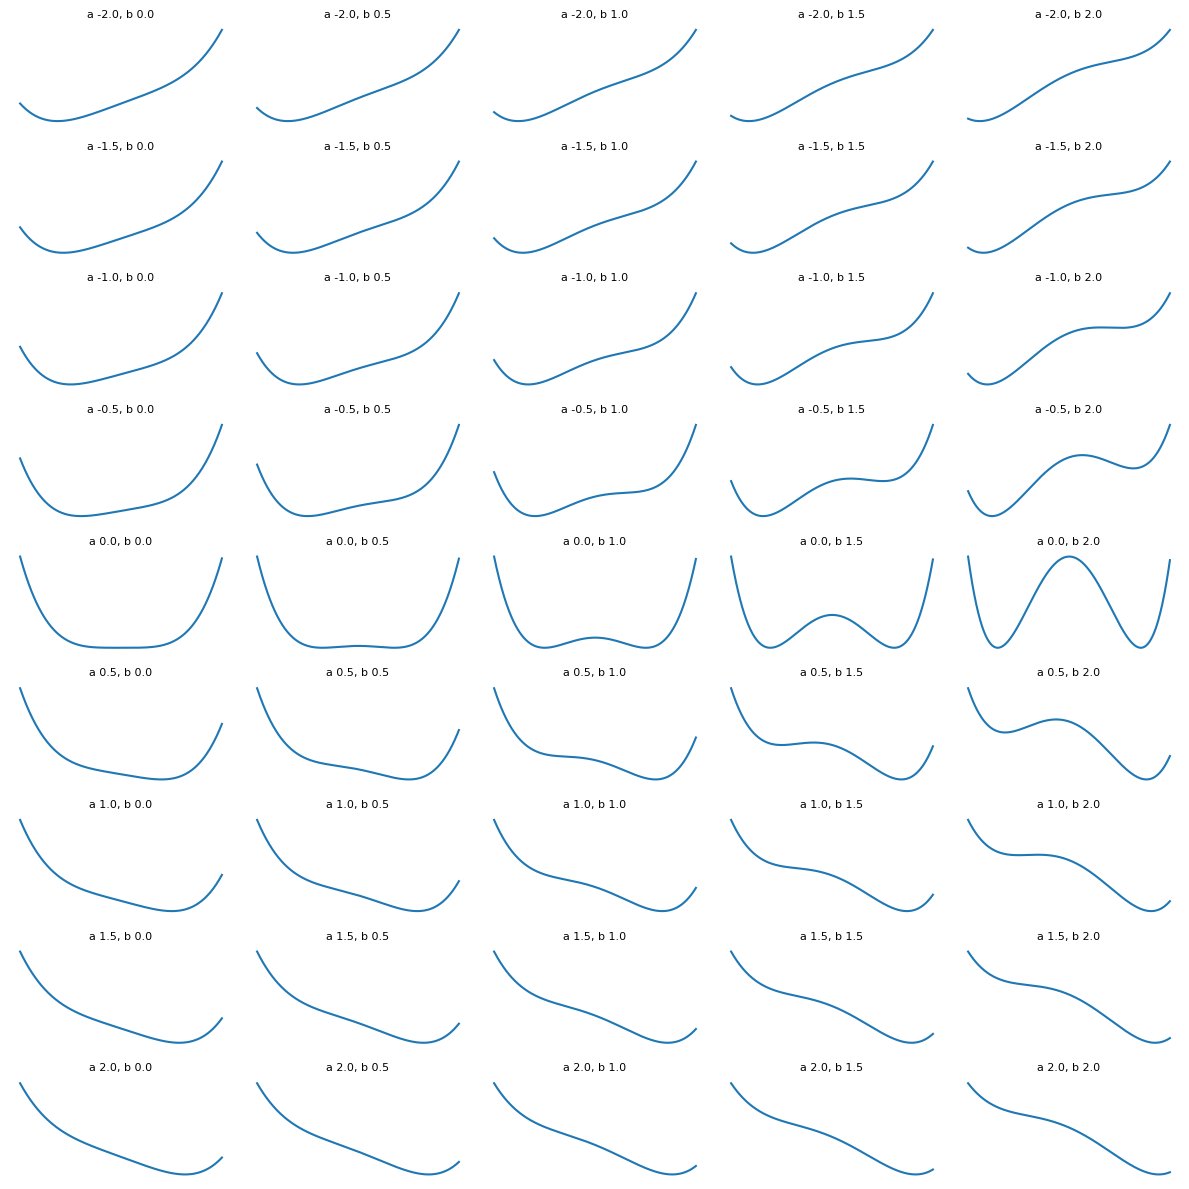

In [ ]:
# figure 3.7 and 3.8 combined

V = lambda x, a, b: -a*X -1/2*b*X**2 + 1/4*X**4
X = np.arange(-2, 2, 0.01)
a_range = np.arange(-2, 2.5, 0.5)
b_range = np.arange(0, 2.5, 0.5)

fig, axs = plt.subplots(len(a_range), len(b_range), 
                        sharex=True, sharey=False, figsize=(12,12))
for aix, a in enumerate(a_range):
    for bix, b in enumerate(b_range):
        axs[aix, bix].plot(X, V(X, a, b))
        axs[aix, bix].set_title('a %.1f, b %.1f'%(a,b), {'fontsize':8})
        axs[aix, bix].set_axis_off()
fig.tight_layout()
sns.despine()
        


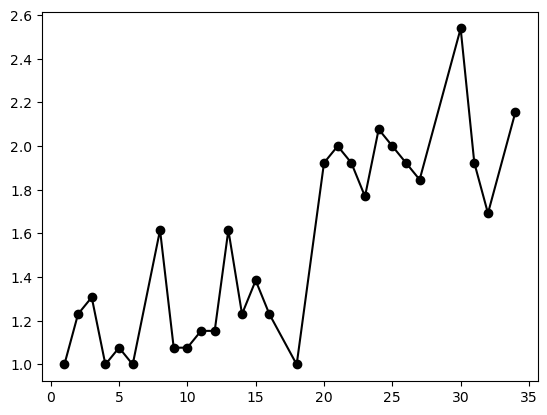

In [30]:
# figure 3.19
df = pd.read_csv('https://raw.githubusercontent.com/SantaFeInstitute/ComplexPsych/refs/heads/master/data/PNAS_patient_data.txt',
                 header=0, sep='\t') # tab delineated
plt.plot(df.week, df.dep, '-ok')
# change point detection in Python: https://github.com/deepcharles/ruptures